In [1]:
#importing libraries that will be needed throughout the script
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
import sklearn.linear_model

# setting pandas print options
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

file = './birthweight_low.xlsx'

birthweight = pd.read_excel(io = file,
                           header = 0)

birthweight.head(10)

,mage,meduc,monpre,npvis,fage,feduc,omaps,fmaps,cigs,drink,male,mwhte,mblck,moth,fwhte,fblck,foth,bwght
0,69,NaN,5,2.0,62,NaN,4,7,23,9,1,0,1,0,0,1,0,697
1,68,12.0,3,10.0,61,11.0,4,6,25,11,1,1,0,0,1,0,0,1290
2,71,12.0,3,6.0,46,12.0,2,7,21,12,1,0,1,0,0,1,0,1490
3,59,16.0,1,8.0,48,16.0,7,8,21,10,0,0,0,1,0,0,1,1720
4,48,12.0,4,6.0,39,12.0,2,9,17,13,0,1,0,0,1,0,0,1956
5,67,11.0,4,8.0,40,8.0,4,9,16,14,0,1,0,0,1,0,0,1984
6,54,12.0,2,12.0,46,12.0,9,9,17,12,1,0,1,0,0,1,0,2050
7,71,14.0,4,7.0,51,11.0,9,8,15,13,0,1,0,0,1,0,0,2068
8,56,12.0,1,9.0,53,14.0,8,9,14,9,1,1,0,0,1,0,0,2148
9,58,12.0,2,12.0,61,16.0,9,9,13,6,0,0,1,0,0,1,0,2180


1. Loading the Dataset

The first thing to do was to load the dataset to Python and import all of the different libraries and tools that would be of use while working with the data and developing the model. 
After doing that, it was important to know the shape of the data, meaning the number of rows and columns we were dealing with, the type of data we would be working with and the descriptive statistics of the same. 

In [2]:
# Getting the number of columns and rows our Dataset has
birthweight.shape

(196, 18)

In [3]:
# formatting and printing the dimensions of the dataset
print(f"""
Size of Original Dataset
------------------------
Observations: {birthweight.shape[0]}
Features:     {birthweight.shape[1]}   
""")


Size of Original Dataset
------------------------
Observations: 196
Features:     18   



In [4]:
#analyzing the data information.
#Seeing which type of variables we are dealing with. 
birthweight.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196 entries, 0 to 195
Data columns (total 18 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   mage    196 non-null    int64  
 1   meduc   193 non-null    float64
 2   monpre  196 non-null    int64  
 3   npvis   193 non-null    float64
 4   fage    196 non-null    int64  
 5   feduc   189 non-null    float64
 6   omaps   196 non-null    int64  
 7   fmaps   196 non-null    int64  
 8   cigs    196 non-null    int64  
 9   drink   196 non-null    int64  
 10  male    196 non-null    int64  
 11  mwhte   196 non-null    int64  
 12  mblck   196 non-null    int64  
 13  moth    196 non-null    int64  
 14  fwhte   196 non-null    int64  
 15  fblck   196 non-null    int64  
 16  foth    196 non-null    int64  
 17  bwght   196 non-null    int64  
dtypes: float64(3), int64(15)
memory usage: 27.7 KB


In [5]:
#Descriptive analytics of the data.
#Helps to understand the data we are working with.
birthweight.describe().round(decimals = 2)

,mage,meduc,monpre,npvis,fage,feduc,omaps,fmaps,cigs,drink,male,mwhte,mblck,moth,fwhte,fblck,foth,bwght
count,196.00,193.00,196.00,193.00,196.00,189.00,196.00,196.00,196.00,196.00,196.00,196.00,196.00,196.00,196.00,196.00,196.00,196.00
mean,40.15,13.91,2.34,11.60,39.29,13.85,8.19,8.96,10.93,5.40,0.55,0.27,0.38,0.35,0.35,0.34,0.31,3334.09
std,10.25,2.06,1.36,4.27,8.98,2.63,1.58,0.65,6.10,3.00,0.50,0.45,0.49,0.48,0.48,0.48,0.46,646.70
min,23.00,8.00,1.00,2.00,23.00,1.00,2.00,5.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,697.00
25%,33.00,12.00,2.00,10.00,34.75,12.00,8.00,9.00,6.00,4.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2916.25
50%,39.00,14.00,2.00,12.00,38.00,14.00,9.00,9.00,11.00,5.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,3452.00
75%,46.00,16.00,3.00,12.00,43.00,16.00,9.00,9.00,15.25,7.25,1.00,1.00,1.00,1.00,1.00,1.00,1.00,3759.50
max,71.00,17.00,8.00,35.00,73.00,17.00,10.00,10.00,25.00,14.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,4933.00


In [6]:
# taking the birthweight dataset and checking for null values within it.
# summing together the results per column
birthweight.isnull().sum(axis = 0)

mage      0
meduc     3
monpre    0
npvis     3
fage      0
feduc     7
omaps     0
fmaps     0
cigs      0
drink     0
male      0
mwhte     0
mblck     0
moth      0
fwhte     0
fblck     0
foth      0
bwght     0
dtype: int64

In [7]:
# As meduc, feduc and npvis are intervals, the mode for each will be calculated

meduc_mode = birthweight['meduc'].mode()
feduc_mode = birthweight['feduc'].mode()
npvis_mode = birthweight['npvis'].mode()


# imputing the missing values for meduc with the mode
# calculated above
birthweight['meduc'].fillna(value = meduc_mode[0],
                                inplace = True)

# imputing the missing values for feduc with the mode
# calculated above
birthweight['feduc'].fillna(value = feduc_mode[0],
                                inplace = True)

# imputing the missing values for npvis with the mode
# calculated above
birthweight['npvis'].fillna(value = npvis_mode[0],
                                inplace = True)

In [8]:
# making sure all missing values have been taken care of
birthweight.isnull().any().any()

False

After doing some analysis of the data, info and describe, analyzing the y-variable seemed like the right thing to do. 
Creating a Histplot to see how the y-variable (bwght) was behaving itself and then be able to decide whether to get it's log or not, depending on the skewness it had. 
Histograms for other variables such as: age of mother, age of father, education for mother, education for father, average drinks and average cigarettes in a day were also made. This to make sure if the data was or was not skewed, and decide if developing the log variable for each was necessary. 

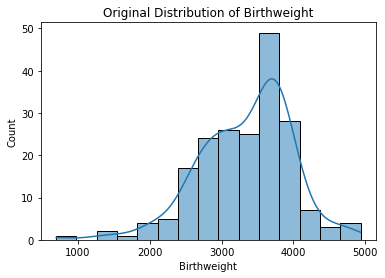

In [9]:
# developing a histogram using HISTPLOT to analyze the y-variable: bwght
sns.histplot(data  = birthweight,
             x     = "bwght",
             kde    = True)


#Labels for both the title and the axis
plt.title(label = "Original Distribution of Birthweight")
plt.xlabel(xlabel = "Birthweight")
plt.ylabel(ylabel = "Count")


# displaying the histogram
plt.show()

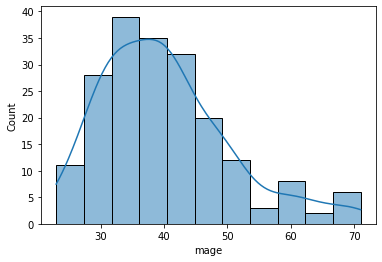

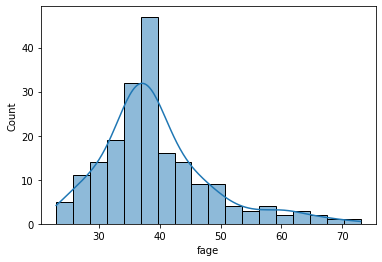

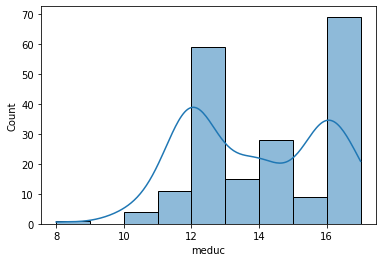

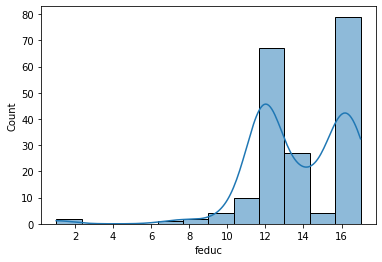

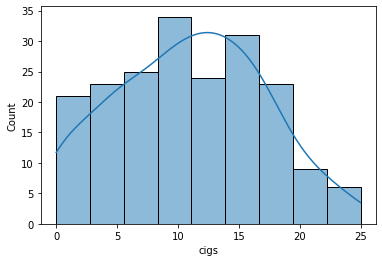

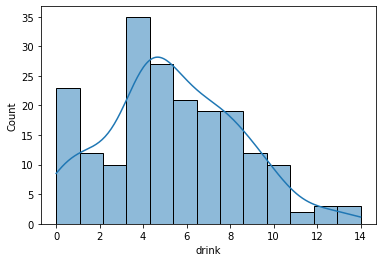

In [10]:
# histogram for mage
sns.histplot(data   = birthweight,
             x      = 'mage',
             kde    = True)


# rendering the plot
plt.show()


# histogram for fage
sns.histplot(data   = birthweight,
             x      = 'fage',
             kde    = True)


# rendering the plot
plt.show()

# histogram for mage
sns.histplot(data   = birthweight,
             x      = 'meduc',
             kde    = True)


# rendering the plot
plt.show()


# histogram for fage
sns.histplot(data   = birthweight,
             x      = 'feduc',
             kde    = True)


# rendering the plot
plt.show()

# histogram for mage
sns.histplot(data   = birthweight,
             x      = 'cigs',
             kde    = True)


# rendering the plot
plt.show()


# histogram for fage
sns.histplot(data   = birthweight,
             x      = 'drink',
             kde    = True)


# rendering the plot
plt.show()

In [11]:
# Printing the columns within the dataset

for columns in birthweight:
    print("'" + columns + "'", end = "',")

'mage'','meduc'','monpre'','npvis'','fage'','feduc'','omaps'','fmaps'','cigs'','drink'','male'','mwhte'','mblck'','moth'','fwhte'','fblck'','foth'','bwght'',

Defining which variable belongs to which category. This makes it easier to know how to handle the data and which changes it can be subject of. 

Continuous data
- mage
- fage
- bwght
- log_bwght

Interval/Count
- meduc
- feduc
- npvis
- monpre
- omaps
- fmaps
- cigs
- drink

Categorical
- male
-mwhte
- mblck
- moth
- fwhte
- fblck
- foth

In [12]:
# creating a list of continuous features (including bwght)
continuous_data = ['bwght', 'mage', 'fage']


# developing a correlation matrix based on continuous features
birthweight_corr = birthweight[continuous_data].corr(method = 'pearson')


# filtering the results to only show correlations with Sale_Price
birthweight_corr.loc[ : , 'bwght'].round(decimals = 2).sort_values(ascending = False)

bwght    1.00
fage    -0.40
mage    -0.46
Name: bwght, dtype: float64

Taking into account the correlations, we can see that the age of the father does not really have an impact on the birth weight of a baby. 
There are different studies that determine that the factors that affect the most our y-variable are related to the mother and her habits. So the variables that are taken into account in this part are the age of the mother, the average cigarettes she has per day, alcoholic drinks per day she drinks, and her ethnicity. 
The age and ethnicity of the father have been disregarded in this part, as they do not seem to be as determinant for the baby's weight. 
The sex of the baby has been taken into account, because male babies tend to be larger in size than female babies. 

Sources: https://pubmed.ncbi.nlm.nih.gov/7570074/#:~:text=Most%20factors%2C%20such%20as%20maternal,distribution%2C%20indicating%20a%20generalized%20effect.

https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3390317/

https://www.marsden-weighing.co.uk/blog/factors-affect-baby-birth-weight

In [13]:
#Initiating the model, with the variables continuos and not
lm_best = smf.ols(formula =  """bwght ~ mage +
                                cigs +
                                drink +
                                male +
                                mwhte""",
                                data = birthweight)


# Step 2: FIT the data into the model object
results = lm_best.fit()


# Step 3: analyze the SUMMARY output
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  bwght   R-squared:                       0.705
Model:                            OLS   Adj. R-squared:                  0.697
Method:                 Least Squares   F-statistic:                     90.80
Date:                Wed, 24 Nov 2021   Prob (F-statistic):           1.83e-48
Time:                        19:48:57   Log-Likelihood:                -1426.5
No. Observations:                 196   AIC:                             2865.
Df Residuals:                     190   BIC:                             2885.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4919.8518    114.519     42.961      0.0

In [14]:
# Step 1: INSTANTIATE a model object
lm_best = smf.ols(formula =  """bwght ~ mage +
                                cigs +
                                drink +
                                male +
                                mblck""",
                                data = birthweight)


# Step 2: FIT the data into the model object
results = lm_best.fit()


# Step 3: analyze the SUMMARY output
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  bwght   R-squared:                       0.705
Model:                            OLS   Adj. R-squared:                  0.697
Method:                 Least Squares   F-statistic:                     90.80
Date:                Wed, 24 Nov 2021   Prob (F-statistic):           1.84e-48
Time:                        19:48:58   Log-Likelihood:                -1426.5
No. Observations:                 196   AIC:                             2865.
Df Residuals:                     190   BIC:                             2885.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4921.5494    116.152     42.372      0.0

In [15]:
# Step 1: INSTANTIATE a model object
lm_best = smf.ols(formula =  """bwght ~ mage +
                                cigs +
                                drink +
                                male +
                                moth""",
                                data = birthweight)


# Step 2: FIT the data into the model object
results = lm_best.fit()


# Step 3: analyze the SUMMARY output
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  bwght   R-squared:                       0.705
Model:                            OLS   Adj. R-squared:                  0.697
Method:                 Least Squares   F-statistic:                     90.92
Date:                Wed, 24 Nov 2021   Prob (F-statistic):           1.69e-48
Time:                        19:48:58   Log-Likelihood:                -1426.4
No. Observations:                 196   AIC:                             2865.
Df Residuals:                     190   BIC:                             2884.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4909.2841    114.022     43.056      0.0

Counting the values for the interval/count values and the categorical values, to see how many we are dealing with and how to proceed with working with them for the modeling later on. 

In [16]:
# printing value counts for habits: cigarettes and alcoholic drinks per day
print(f"""
Count of habits
==================

----------
Drinks
----------
{birthweight['drink'].value_counts(normalize = False).sort_index()}


----------
Cigarettes
----------
{birthweight['cigs'].value_counts(normalize = False).sort_index()}


""")


Count of habits

----------
Drinks
----------
0     11
1     12
2     12
3     10
4     35
5     27
6     21
7     19
8     19
9     12
10    10
11     2
12     3
13     2
14     1
Name: drink, dtype: int64


----------
Cigarettes
----------
0      9
1      8
2      4
3      4
4      8
5     11
6      9
7      5
8     11
9     11
10    10
11    13
12     9
13    15
14    11
15     9
16    11
17    12
18     5
19     6
20     2
21     5
22     2
23     3
24     1
25     2
Name: cigs, dtype: int64





In [17]:
# printing columns
print(f"""
Male
------
{birthweight['male'].value_counts()}


Mother ethnicity: white
----------
{birthweight['mwhte'].value_counts()}


Mother ethnicity: black
-------------
{birthweight['mblck'].value_counts()}


Mother ethnicity: other
----------
{birthweight['moth'].value_counts()}


Father ethnicity: white
-------------
{birthweight['fwhte'].value_counts()}


Father ethnicity: black
----------
{birthweight['fblck'].value_counts()}


Father ethnicity: other
-------------
{birthweight['foth'].value_counts()}


""")


Male
------
1    108
0     88
Name: male, dtype: int64


Mother ethnicity: white
----------
0    143
1     53
Name: mwhte, dtype: int64


Mother ethnicity: black
-------------
0    121
1     75
Name: mblck, dtype: int64


Mother ethnicity: other
----------
0    128
1     68
Name: moth, dtype: int64


Father ethnicity: white
-------------
0    128
1     68
Name: fwhte, dtype: int64


Father ethnicity: black
----------
0    129
1     67
Name: fblck, dtype: int64


Father ethnicity: other
-------------
0    135
1     61
Name: foth, dtype: int64





In the dataset, the columns containing the ethnicity of the mother and the father are already considered dummies, and because of this, one of the categories has to be drop from the data used for the training and testing sets, for the modeling. It is decided to drop the ones that include if the mother is white and the one that includes if the father is black.

In [18]:
#dropping one of the categories for ethnicity

birthweight = birthweight.drop(['mwhte','fblck'], axis = 1)

In [19]:
# creating the training and testing sets. 
# preparing explanatory variable data
birthweight_data   = birthweight.drop(["bwght"],
                               axis = 1)


# preparing response variables
birthweight_target = birthweight.loc[ : , "bwght"]



# preparing training and testing sets (all letters are lowercase)
x_train, x_test, y_train, y_test = train_test_split(
            birthweight_data,
            birthweight_target,
            test_size = 0.25,
            random_state = 219)


# checking the shapes of the datasets
print(f"""
Training Data
-------------
X-side: {x_train.shape}
y-side: {y_train.shape}


Testing Data
------------
X-side: {x_test.shape}
y-side: {y_test.shape}
""")


Training Data
-------------
X-side: (147, 15)
y-side: (147,)


Testing Data
------------
X-side: (49, 15)
y-side: (49,)



From this moment on, we will consider the x-variables that are believed to affect the most the weight of a baby. As it was stated before, it is believed that the habits of the mother have a direct impact on it. The age of the mother has also a great impact, as well as the ethnicity she has. Education is also believed to have a great impact, just because it will determine how the mother takes care of herself and therefore the child she is bearing. 

In [38]:
x_variables = ['mage', 'mblck',
               'moth', 'npvis', 'drink', 'monpre']

for val in x_variables:
    print(f"{val} +")

mage +
mblck +
moth +
npvis +
drink +
monpre +


Moving forward, the variables considered for this model have to do with the mother and the habits she has. Variables taken into account are the age of the mother, the ethnicity she has, whenever she started going to her prenatal visits and the average drinks she had on a day, during her pregnancy. 

In [39]:
birthweight_train = pd.concat([x_train, y_train], axis = 1)

lm_best = smf.ols(formula = """bwght ~ mage +
mblck +
moth +
npvis +
drink +
monpre
""", 
                  data = birthweight_train)

results = lm_best.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  bwght   R-squared:                       0.610
Model:                            OLS   Adj. R-squared:                  0.593
Method:                 Least Squares   F-statistic:                     36.47
Date:                Wed, 24 Nov 2021   Prob (F-statistic):           2.37e-26
Time:                        19:52:40   Log-Likelihood:                -1095.5
No. Observations:                 147   AIC:                             2205.
Df Residuals:                     140   BIC:                             2226.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4928.6152    207.688     23.731      0.0

In [40]:
# applying modelin scikit-learn

# preparing x-variables from the OLS model
ols_data = birthweight.loc[ : , x_variables ]


# preparing response variable
birthweight_target = birthweight.loc[ : , 'bwght']



#Preparing the data for more than one train-test split

x_train_FULL, x_test_FULL, y_train_FULL, y_test_FULL = train_test_split(
            birthweight_data,     
            birthweight_target,   
            test_size = 0.25,
            random_state = 219)


# OLS p-value x-dataset
x_train_OLS, x_test_OLS, y_train_OLS, y_test_OLS = train_test_split(
            ols_data,         # x-variables
            birthweight_target,   # y-variable
            test_size = 0.25,
            random_state = 219)

In [41]:
#Linear Regression
lr = LinearRegression() 


# We fit to the training data
lr_fit = lr.fit(x_train_OLS, y_train_OLS)


# We predict on new data, using the OLS data that was created above. 
lr_pred = lr_fit.predict(x_test_OLS)


# Scoring the results of the regression
print('OLS Training Score :', lr.score(x_train_OLS, y_train_OLS).round(4))  # using R-square
print('OLS Testing Score  :',  lr.score(x_test_OLS, y_test_OLS).round(4)) # using R-square

lr_train_score = lr.score(x_train_OLS, y_train_OLS).round(4)
lr_test_score = lr.score(x_test_OLS, y_test_OLS).round(4)



#We display and save the gap between the training and testing set
print('OLS Train-Test Gap :', abs(lr_train_score - lr_test_score).round(4))
lr_test_gap = abs(lr_train_score - lr_test_score).round(4)

OLS Training Score : 0.6098
OLS Testing Score  : 0.5467
OLS Train-Test Gap : 0.0631


In [24]:
# zipping each feature name to its coefficient
lr_model_values = zip(birthweight_data[x_variables].columns,
                      lr_fit.coef_.round(decimals = 2))


# setting up a placeholder list to store model features
lr_model_lst = [('intercept', lr_fit.intercept_.round(decimals = 2))]


# printing out each feature-coefficient pair one by one
for val in lr_model_values:
    lr_model_lst.append(val)
    

# checking the results
for pair in lr_model_lst:
    print(pair)

('intercept', 4900.42)
('mage', -19.06)
('mblck', 24.42)
('moth', -114.32)
('npvis', -0.13)
('drink', -137.69)


In [25]:
#Model object: Lasso model
lasso_model = sklearn.linear_model.Lasso(alpha = 1.0,
                                         normalize = True) # default magitude

#We fit the training data
lasso_fit = lasso_model.fit(x_train_FULL, y_train_FULL)


#We predict on the test data, only x
lasso_pred = lasso_fit.predict(x_test_FULL)


# We score the results of the Lasso model
print('Lasso Training Score for Birthweight :', lasso_model.score(x_train_FULL, y_train_FULL).round(4))
print('Lasso Testing Score for Birthweight  :', lasso_model.score(x_test_FULL, y_test_FULL).round(4))


# saving scoring data for future use
lasso_train_score = lasso_model.score(x_train_FULL, y_train_FULL).round(4) # using R-square
lasso_test_score  = lasso_model.score(x_test_FULL, y_test_FULL).round(4)   # using R-square


#We display and save the gap between the training and testing set
print('Lasso Train-Test Gap :', abs(lasso_train_score - lasso_test_score).round(4))
lasso_test_gap = abs(lasso_train_score - lasso_test_score).round(4)

Lasso Training Score for Birthweight : 0.7375
Lasso Testing Score for Birthweight  : 0.6114
Lasso Train-Test Gap : 0.1261


In [26]:
# zipping each feature name to its coefficient
lasso_model_values = zip(birthweight_data.columns, lasso_fit.coef_.round(decimals = 2))


# setting up a placeholder list to store model features
lasso_model_lst = [('intercept', lasso_fit.intercept_.round(decimals = 2))]


# printing out each feature-coefficient pair one by one
for val in lasso_model_values:
    lasso_model_lst.append(val)
    

# checking the results
for pair in lasso_model_lst:
    print(pair)

('intercept', 3809.3)
('mage', -13.73)
('meduc', 17.38)
('monpre', 0.0)
('npvis', 1.0)
('fage', -3.07)
('feduc', 15.78)
('omaps', 0.0)
('fmaps', 78.39)
('cigs', -37.15)
('drink', -100.46)
('male', 46.93)
('mblck', 0.0)
('moth', -80.45)
('fwhte', -0.0)
('foth', -0.0)


In [27]:
for feature, coefficient in lasso_model_lst:
        
        if coefficient == 0:
            lasso_model_lst.remove((feature, coefficient))

            
# checking the results
for pair in lasso_model_lst:
    print(pair)

('intercept', 3809.3)
('mage', -13.73)
('meduc', 17.38)
('npvis', 1.0)
('fage', -3.07)
('feduc', 15.78)
('fmaps', 78.39)
('cigs', -37.15)
('drink', -100.46)
('male', 46.93)
('moth', -80.45)
('foth', -0.0)


In [28]:
#ARD model is initialized
ard_model = sklearn.linear_model.ARDRegression(normalize  = False)


#The training data for this model is fitted
ard_fit = ard_model.fit(x_train_FULL, y_train_FULL)


#We predict on new data
ard_pred = ard_fit.predict(x_test_FULL)


print('Training Score for Birthweight:', ard_model.score(x_train_FULL, y_train_FULL).round(4))
print('Testing Score for Birthweight:',  ard_model.score(x_test_FULL, y_test_FULL).round(4))


# saving scoring data for future use
ard_train_score = ard_model.score(x_train_FULL, y_train_FULL).round(4)
ard_test_score  = ard_model.score(x_test_FULL, y_test_FULL).round(4)


#We display and save the gap between the training and testing set
print('ARD Train-Test Gap :', abs(ard_train_score - ard_test_score).round(4))
ard_test_gap = abs(ard_train_score - ard_test_score).round(4)

Training Score for Birthweight: 0.7342
Testing Score for Birthweight: 0.6221
ARD Train-Test Gap : 0.1121


In [29]:
# zipping each feature name to its coefficient
ard_model_values = zip(birthweight_data.columns, ard_fit.coef_.round(decimals = 5))


# setting up a placeholder list to store model features
ard_model_lst = [('intercept', ard_fit.intercept_.round(decimals = 2))]


# printing out each feature-coefficient pair one by one
for val in ard_model_values:
    ard_model_lst.append(val)
    

# checking the results
for pair in ard_model_lst:
    print(pair)

('intercept', 3952.07)
('mage', -15.41149)
('meduc', 15.00391)
('monpre', 2e-05)
('npvis', 0.00119)
('fage', -0.73768)
('feduc', 13.28127)
('omaps', 0.00036)
('fmaps', 73.12501)
('cigs', -38.58097)
('drink', -103.93802)
('male', 18.54323)
('mblck', 0.00031)
('moth', -57.83953)
('fwhte', -9e-05)
('foth', -0.00045)


In [30]:
#We drop coefficients that are equal to zero

# printing out each feature-coefficient pair one by one
for feature, coefficient in ard_model_lst:
        
        if coefficient == 0:
            ard_model_lst.remove((feature, coefficient))

            
# checking the results
for pair in ard_model_lst:
    print(pair)

('intercept', 3952.07)
('mage', -15.41149)
('meduc', 15.00391)
('monpre', 2e-05)
('npvis', 0.00119)
('fage', -0.73768)
('feduc', 13.28127)
('omaps', 0.00036)
('fmaps', 73.12501)
('cigs', -38.58097)
('drink', -103.93802)
('male', 18.54323)
('mblck', 0.00031)
('moth', -57.83953)
('fwhte', -9e-05)
('foth', -0.00045)


In [31]:
# comparing results

print(f"""
Model      Train Score      Test Score
-----      -----------      ----------
**OLS        {lr_train_score}           {lr_test_score}
Lasso      {lasso_train_score}           {lasso_test_score}
ARD        {ard_train_score}           {ard_test_score}

** best model
""")


# creating a dictionary for model results
model_performance = {
    
    'Model Type'    : ['OLS', 'Lasso', 'ARD'],
           
    'Training' : [lr_train_score, lasso_train_score,
                                   ard_train_score],
           
    'Testing'  : [lr_test_score, lasso_test_score,
                                   ard_test_score],
                    
    'Train-Test Gap' : [lr_test_gap, lasso_test_gap,
                                        ard_test_gap],
                    
    'Model Size' : [len(lr_model_lst), len(lasso_model_lst),
                                    len(ard_model_lst)],
                    
    'Model' : [lr_model_lst, lasso_model_lst, ard_model_lst]}




# converting model_performance into a DataFrame
model_performance = pd.DataFrame(model_performance)



Model      Train Score      Test Score
-----      -----------      ----------
**OLS        0.6095           0.5482
Lasso      0.7375           0.6114
ARD        0.7342           0.6221

** best model

